In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import six

In [2]:
df_flange = pd.read_csv('data/pipe.csv')

In [3]:
df_flange_train = df_flange.query("T == 'training'").drop(columns=['T','No','30','40','50','60','70','80','90'])
df_flange_test = df_flange.query("T == 'test'").drop(columns=['T','No','30','40','50','60','70','80','90'])
df_flange_train_corr = df_flange_train.drop(columns=['GP','WP'])
df_flange_test_corr = df_flange_test.drop(columns=['GP','WP'])

In [4]:
df_flange_30 = df_flange.loc[0:29,'30']
df_flange_40 = df_flange.loc[0:29,'40']
df_flange_50 = df_flange.loc[0:29,'50']
df_flange_60 = df_flange.loc[0:29,'60']
df_flange_70 = df_flange.loc[0:29,'70']
df_flange_80 = df_flange.loc[0:29,'80']
df_flange_90 = df_flange.loc[0:29,'90']

In [5]:
df_flange_train.corr()

,L,B,D,T.1,DWT,SC,OP,GP,WP,CREW,WD,TLWT,Total_pipe
L,1.000000,0.800507,0.708220,0.787409,0.831970,0.759617,0.498982,0.251088,0.219355,0.437695,0.689074,0.522639,0.521820
B,0.800507,1.000000,0.921968,0.935546,0.960828,0.918393,0.707053,0.378457,0.460599,0.576606,0.860151,0.831618,0.681177
D,0.708220,0.921968,1.000000,0.959301,0.883952,0.899125,0.737340,0.446433,0.454727,0.519198,0.786949,0.863230,0.733291
T.1,0.787409,0.935546,0.959301,1.000000,0.935242,0.914190,0.740323,0.389185,0.502902,0.554862,0.816102,0.821027,0.680755
DWT,0.831970,0.960828,0.883952,0.935242,1.000000,0.931129,0.714035,0.252682,0.481123,0.489570,0.888393,0.767432,0.587291
SC,0.759617,0.918393,0.899125,0.914190,0.931129,1.000000,0.736439,0.326827,0.460806,0.428039,0.855559,0.821997,0.631354
OP,0.498982,0.707053,0.737340,0.740323,0.714035,0.736439,1.000000,0.588084,0.533555,0.512096,0.829256,0.837969,0.635327
GP,0.251088,0.378457,0.446433,0.389185,0.252682,0.326827,0.588084,1.000000,0.176115,0.408020,0.402254,0.561381,0.524479
WP,0.219355,0.460599,0.454727,0.502902,0.481123,0.460806,0.533555,0.176115,1.000000,0.407635,0.563393,0.526544,0.471650
CREW,0.437695,0.576606,0.519198,0.554862,0.489570,0.428039,0.512096,0.408020,0.407635,1.000000,0.482154,0.677164,0.631725


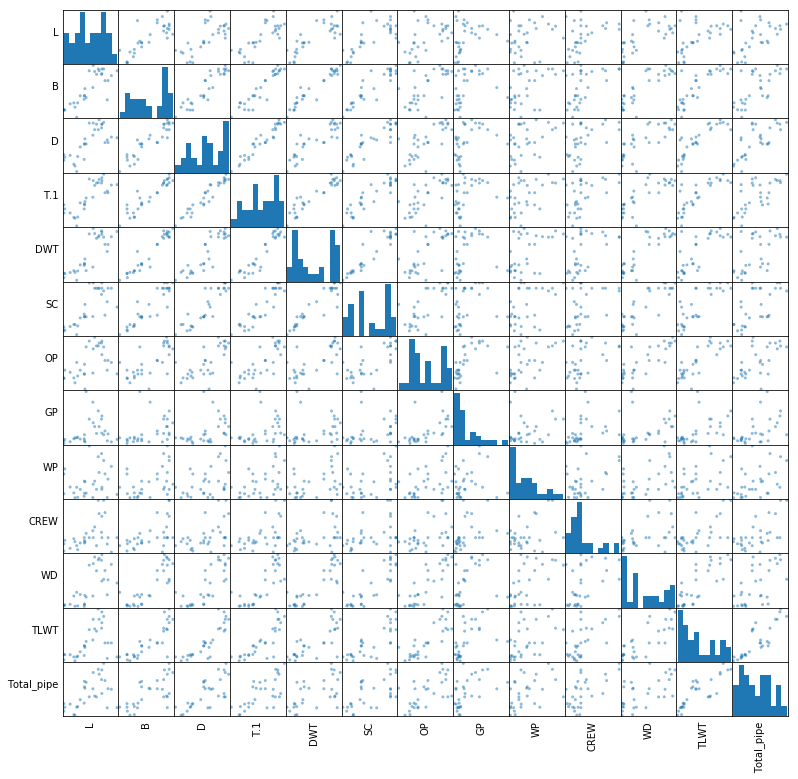

In [6]:
axs = pd.plotting.scatter_matrix(df_flange_train, figsize=(13,13))
n=len(df_flange_train.columns)
for i in range(n):
    v = axs[i,0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1,i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Linear Regression

In [7]:
linear_regressor_30 = LinearRegression()
linear_regressor_40 = LinearRegression()
linear_regressor_50 = LinearRegression()
linear_regressor_60 = LinearRegression()
linear_regressor_70 = LinearRegression()
linear_regressor_80 = LinearRegression()
linear_regressor_90 = LinearRegression()

In [8]:
linear_model_flange30 = linear_regressor_30.fit(df_flange_train,df_flange_30)
linear_model_flange40 = linear_regressor_40.fit(df_flange_train,df_flange_40)
linear_model_flange50 = linear_regressor_50.fit(df_flange_train,df_flange_50)
linear_model_flange60 = linear_regressor_60.fit(df_flange_train,df_flange_60)
linear_model_flange70 = linear_regressor_70.fit(df_flange_train,df_flange_70)
linear_model_flange80 = linear_regressor_80.fit(df_flange_train,df_flange_80)
linear_model_flange90 = linear_regressor_90.fit(df_flange_train,df_flange_90)

In [9]:
flange30_prediction_linear = linear_model_flange30.predict(df_flange_test)
flange40_prediction_linear = linear_model_flange40.predict(df_flange_test)
flange50_prediction_linear = linear_model_flange50.predict(df_flange_test)
flange60_prediction_linear = linear_model_flange60.predict(df_flange_test)
flange70_prediction_linear = linear_model_flange70.predict(df_flange_test)
flange80_prediction_linear = linear_model_flange80.predict(df_flange_test)
flange90_prediction_linear = linear_model_flange90.predict(df_flange_test)

In [10]:
print(flange30_prediction_linear)
print(flange40_prediction_linear)
print(flange50_prediction_linear)
print(flange60_prediction_linear)
print(flange70_prediction_linear)
print(flange80_prediction_linear)
print(flange90_prediction_linear)

[66.98835178 56.31000868 79.95922845]
[590.97899143 496.51867876 733.84297594]
[1506.96675713 1119.74595932 1620.47715642]
[2202.03940912 2166.52834192 2597.86663974]
[1407.46808199 1313.26528706 1861.66037799]
[626.46545482 523.34846282 708.42480616]
[315.09295374 211.28326144 387.7688153 ]


# 2nd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [11]:
poly_2nd_30 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [12]:
poly_2nd_model_flange30 = poly_2nd_30.fit(df_flange_train,df_flange_30)
poly_2nd_model_flange40 = poly_2nd_40.fit(df_flange_train,df_flange_40)
poly_2nd_model_flange50 = poly_2nd_50.fit(df_flange_train,df_flange_50)
poly_2nd_model_flange60 = poly_2nd_60.fit(df_flange_train,df_flange_60)
poly_2nd_model_flange70 = poly_2nd_70.fit(df_flange_train,df_flange_70)
poly_2nd_model_flange80 = poly_2nd_80.fit(df_flange_train,df_flange_80)
poly_2nd_model_flange90 = poly_2nd_90.fit(df_flange_train,df_flange_90)

In [13]:
flange30_prediction_poly_2nd = poly_2nd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_2nd = poly_2nd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_2nd = poly_2nd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_2nd = poly_2nd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_2nd = poly_2nd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_2nd = poly_2nd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_2nd = poly_2nd_model_flange90.predict(df_flange_test)

In [14]:
print(flange30_prediction_poly_2nd)
print(flange40_prediction_poly_2nd)
print(flange50_prediction_poly_2nd)
print(flange60_prediction_poly_2nd)
print(flange70_prediction_poly_2nd)
print(flange80_prediction_poly_2nd)
print(flange90_prediction_poly_2nd) 

[79.30622968 29.56097901 71.50752688]
[716.70641443 468.60363772 827.58175098]
[1972.10342859  467.9511609  1258.81472924]
[2261.03601273 2053.54059882 2699.69402544]
[1434.45268185  866.3425655  1585.04426926]
[329.34277651 352.1051898  334.11335594]
[ 967.17328733 -222.84612319  631.96902543]


# 3rd Degree Poly Regression
* n차 다항식 및 변수 끼리의 곱으로만

In [15]:
poly_3rd_30 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [16]:
poly_3rd_model_flange30 = poly_3rd_30.fit(df_flange_train,df_flange_30)
poly_3rd_model_flange40 = poly_3rd_40.fit(df_flange_train,df_flange_40)
poly_3rd_model_flange50 = poly_3rd_50.fit(df_flange_train,df_flange_50)
poly_3rd_model_flange60 = poly_3rd_60.fit(df_flange_train,df_flange_60)
poly_3rd_model_flange70 = poly_3rd_70.fit(df_flange_train,df_flange_70)
poly_3rd_model_flange80 = poly_3rd_80.fit(df_flange_train,df_flange_80)
poly_3rd_model_flange90 = poly_3rd_90.fit(df_flange_train,df_flange_90)

In [17]:
flange30_prediction_poly_3rd = poly_3rd_model_flange30.predict(df_flange_test)
flange40_prediction_poly_3rd = poly_3rd_model_flange40.predict(df_flange_test)
flange50_prediction_poly_3rd = poly_3rd_model_flange50.predict(df_flange_test)
flange60_prediction_poly_3rd = poly_3rd_model_flange60.predict(df_flange_test)
flange70_prediction_poly_3rd = poly_3rd_model_flange70.predict(df_flange_test)
flange80_prediction_poly_3rd = poly_3rd_model_flange80.predict(df_flange_test)
flange90_prediction_poly_3rd = poly_3rd_model_flange90.predict(df_flange_test)

In [18]:
print(flange30_prediction_poly_3rd)
print(flange40_prediction_poly_3rd)
print(flange50_prediction_poly_3rd)
print(flange60_prediction_poly_3rd)
print(flange70_prediction_poly_3rd)
print(flange80_prediction_poly_3rd)
print(flange90_prediction_poly_3rd)

[ 86.20048175  21.77060536 137.09586734]
[ 806.41948151  849.2272712  2035.26935601]
[1848.44693691  -11.53976354 1998.97871224]
[2376.63533238 2845.20335494 6230.21909022]
[1654.9503499   472.82046794 2506.44680032]
[  -1.63224544 -389.98403874  -48.96351574]
[1379.21380265  464.80975256 2263.62842322]


# 상관분석한 결과 반영한 부분

# Linear

In [19]:
linear_regressor_30_corr = LinearRegression()
linear_regressor_40_corr = LinearRegression()
linear_regressor_50_corr = LinearRegression()
linear_regressor_60_corr = LinearRegression()
linear_regressor_70_corr = LinearRegression()
linear_regressor_80_corr = LinearRegression()
linear_regressor_90_corr = LinearRegression()

In [20]:
linear_model_flange30_corr = linear_regressor_30_corr.fit(df_flange_train_corr,df_flange_30)
linear_model_flange40_corr = linear_regressor_40_corr.fit(df_flange_train_corr,df_flange_40)
linear_model_flange50_corr = linear_regressor_50_corr.fit(df_flange_train_corr,df_flange_50)
linear_model_flange60_corr = linear_regressor_60_corr.fit(df_flange_train_corr,df_flange_60)
linear_model_flange70_corr = linear_regressor_70_corr.fit(df_flange_train_corr,df_flange_70)
linear_model_flange80_corr = linear_regressor_80_corr.fit(df_flange_train_corr,df_flange_80)
linear_model_flange90_corr = linear_regressor_90_corr.fit(df_flange_train_corr,df_flange_90)

In [21]:
flange30_prediction_linear_corr = linear_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_linear_corr = linear_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_linear_corr = linear_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_linear_corr = linear_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_linear_corr = linear_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_linear_corr = linear_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_linear_corr = linear_model_flange90_corr.predict(df_flange_test_corr)

In [22]:
print(flange30_prediction_linear_corr)
print(flange40_prediction_linear_corr)
print(flange50_prediction_linear_corr)
print(flange60_prediction_linear_corr)
print(flange70_prediction_linear_corr)
print(flange80_prediction_linear_corr)
print(flange90_prediction_linear_corr)

[66.17328477 56.4049685  79.8859591 ]
[597.07933514 492.19390936 725.5338082 ]
[1422.12882374 1137.02810382 1630.98242608]
[2195.03027987 2153.75890191 2563.93896275]
[1522.37625762 1304.9959697  1884.53373311]
[613.80235212 535.61648654 733.73796563]
[299.40966674 207.00166016 371.38714513]


# Poly 2nd

In [23]:
poly_2nd_30_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_40_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_50_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_60_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_70_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_80_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly_2nd_90_corr = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

In [24]:
poly_2nd_model_flange30_corr = poly_2nd_30_corr.fit(df_flange_train_corr,df_flange_30)
poly_2nd_model_flange40_corr = poly_2nd_40_corr.fit(df_flange_train_corr,df_flange_40)
poly_2nd_model_flange50_corr = poly_2nd_50_corr.fit(df_flange_train_corr,df_flange_50)
poly_2nd_model_flange60_corr = poly_2nd_60_corr.fit(df_flange_train_corr,df_flange_60)
poly_2nd_model_flange70_corr = poly_2nd_70_corr.fit(df_flange_train_corr,df_flange_70)
poly_2nd_model_flange80_corr = poly_2nd_80_corr.fit(df_flange_train_corr,df_flange_80)
poly_2nd_model_flange90_corr = poly_2nd_90_corr.fit(df_flange_train_corr,df_flange_90)

In [25]:
flange30_prediction_poly_2nd_corr = poly_2nd_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_poly_2nd_corr = poly_2nd_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_poly_2nd_corr = poly_2nd_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_poly_2nd_corr = poly_2nd_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_poly_2nd_corr = poly_2nd_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_poly_2nd_corr = poly_2nd_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_poly_2nd_corr = poly_2nd_model_flange90_corr.predict(df_flange_test_corr)

In [26]:
print(flange30_prediction_poly_2nd_corr)
print(flange40_prediction_poly_2nd_corr)
print(flange50_prediction_poly_2nd_corr)
print(flange60_prediction_poly_2nd_corr)
print(flange70_prediction_poly_2nd_corr)
print(flange80_prediction_poly_2nd_corr)
print(flange90_prediction_poly_2nd_corr) 

[63.6544958  54.68696476 87.67508557]
[639.3506941  628.17401429 731.32005137]
[ 758.91618409  849.79382479 1370.5744424 ]
[2524.65070212 2222.49688312 2578.60979053]
[1430.58966807 1037.33771233 1897.16677894]
[ 415.64857856 -122.69516538  646.60149069]
[202.09484162 679.54961412 260.22483498]


# Poly 3rd

In [27]:
poly_3rd_30_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_40_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_50_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_60_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_70_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_80_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly_3rd_90_corr = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

In [28]:
poly_3rd_model_flange30_corr = poly_3rd_30_corr.fit(df_flange_train_corr,df_flange_30)
poly_3rd_model_flange40_corr = poly_3rd_40_corr.fit(df_flange_train_corr,df_flange_40)
poly_3rd_model_flange50_corr = poly_3rd_50_corr.fit(df_flange_train_corr,df_flange_50)
poly_3rd_model_flange60_corr = poly_3rd_60_corr.fit(df_flange_train_corr,df_flange_60)
poly_3rd_model_flange70_corr = poly_3rd_70_corr.fit(df_flange_train_corr,df_flange_70)
poly_3rd_model_flange80_corr = poly_3rd_80_corr.fit(df_flange_train_corr,df_flange_80)
poly_3rd_model_flange90_corr = poly_3rd_90_corr.fit(df_flange_train_corr,df_flange_90)

In [29]:
flange30_prediction_poly_3rd_corr = poly_3rd_model_flange30_corr.predict(df_flange_test_corr)
flange40_prediction_poly_3rd_corr = poly_3rd_model_flange40_corr.predict(df_flange_test_corr)
flange50_prediction_poly_3rd_corr = poly_3rd_model_flange50_corr.predict(df_flange_test_corr)
flange60_prediction_poly_3rd_corr = poly_3rd_model_flange60_corr.predict(df_flange_test_corr)
flange70_prediction_poly_3rd_corr = poly_3rd_model_flange70_corr.predict(df_flange_test_corr)
flange80_prediction_poly_3rd_corr = poly_3rd_model_flange80_corr.predict(df_flange_test_corr)
flange90_prediction_poly_3rd_corr = poly_3rd_model_flange90_corr.predict(df_flange_test_corr)

In [30]:
print(flange30_prediction_poly_3rd_corr)
print(flange40_prediction_poly_3rd_corr)
print(flange50_prediction_poly_3rd_corr)
print(flange60_prediction_poly_3rd_corr)
print(flange70_prediction_poly_3rd_corr)
print(flange80_prediction_poly_3rd_corr)
print(flange90_prediction_poly_3rd_corr)

[ 67.11872167  23.88441586 148.73846625]
[ 812.0142945  -781.10303387 1314.07433371]
[ 756.97288984  886.98646345 2513.08131211]
[2698.66929125 -228.67431929 4654.50035961]
[1363.13569519  688.20962822 2813.57155405]
[ 141.86997356 1126.19966649 1004.98184018]
[  866.30887323 -2503.04860973   601.15503606]
